In [30]:
import sklearn
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt


In [31]:
#create a 1000 samples of r x and y
n_samples = 1000
X, y = make_circles(n_samples, 
                    noise=0.03,
                    random_state=42
                    )
#create a 1000 samples of r x and y

In [32]:
#make a dataframe of circle data
import pandas as pd
circles = pd.DataFrame({'X1': X[:,0],
                        'X2': X[:,1],
                        'label': y})
circles.head(10) #look at the first ten samples

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


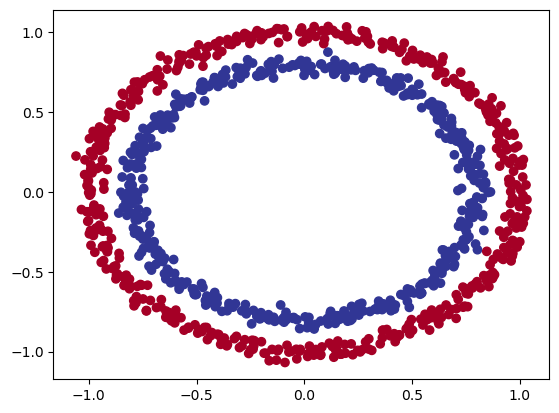

In [33]:
plt.scatter(x=X[:,0],
            y=X[:,1],
            c = y,
            cmap=plt.cm.RdYlBu) #red yellow blue

In [34]:
#check the shape of the data
X.shape, y.shape 

((1000, 2), (1000,))

In [35]:
#view the first sample of X and y
X_sample = X[0]
y_sample = y[0]
print(f"the first sample of X is {X_sample} and the first sample of y is {y_sample}")

the first sample of X is [0.75424625 0.23148074] and the first sample of y is 1


In [36]:
import torch
#X type is np array so it needs to be converted to torch

In [37]:
#X type is np array so it needs to be converted to torch

#convert np array into a tensor 

# due to np array being a 64 float we need to explicitly convert to float 32 that's why we use the torch.float
#it's very important to convert to a float 32 in order to avoid problems with pytorch and it's implementation
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

In [43]:
X.type(), X.dtype #making sure it's 32 float

('torch.FloatTensor', torch.float32)

In [48]:
#get the first five elements
X[:5], y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [50]:
#split data into training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2,
                                                    random_state=42)

In [52]:
len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

In [57]:
from torch import nn
device = "mps" if torch.backends.mps.is_available() else "cpu"
device

'mps'

In [69]:
#construct a model that subclasses nn.Module
class CircleModelV0(nn.Module):
    def __init__(self):
        super().__init__()
        #create two nn.linear layers cabable of handling our data and the data shape
        self.layer_1 = nn.Linear(in_features=2,
                                 out_features=5)
        self.layer_2 = nn.Linear(in_features=5,
                                 out_features=1)
        #define a forward method that outlines the forward pass
        def forward(self,x):
            return self.layer_2(self.layer_1(x)) #x goes into layer one and the output goes to the layer 2

model_0 = CircleModelV0()
model_0.to(device) #get our model into the gpu
#another way of implementing our model mentioned above
# class CircleModelV0(nn.Module):
#     def __init__(self):
#         super().__init__()
#         self.two_linear_layers = nn.Sequential(
#             nn.Linear(in_features=2,out_features=5),
#             nn.Linear(in_features=5,out_features=1)
#         )
#         #define a forward method that outlines the forward pass
#         def forward(self,x):
#             return two_linear_layers(x)
# model_0 = CircleModelV0()
# model_0.to(device) #get our model into the gpu

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [70]:
#let's replicate our model using nn.Sequential
model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
).to(device)
model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [71]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[ 0.3304, -0.2389],
                      [ 0.2758, -0.5604],
                      [-0.0592, -0.1340],
                      [ 0.1929, -0.7004],
                      [-0.6360,  0.4884]], device='mps:0')),
             ('0.bias',
              tensor([-0.6568,  0.5685, -0.4220, -0.4614,  0.6684], device='mps:0')),
             ('1.weight',
              tensor([[ 0.0823, -0.3063,  0.0257, -0.2740,  0.3595]], device='mps:0')),
             ('1.bias', tensor([-0.1848], device='mps:0'))])

In [75]:
#make predictions
with torch.inference_mode():
    untrained_preds = model_0(X_test.to(device))
    
print(f"first 10 predictions\n{untrained_preds[:10]}")
print(f"first 10 labels\n {y_test[:10]}")

first 10 predictions
tensor([[ 0.4228],
        [ 0.4330],
        [ 0.0196],
        [ 0.5386],
        [-0.5779],
        [-0.5670],
        [-0.0647],
        [-0.3004],
        [ 0.0454],
        [ 0.4271]], device='mps:0')
first 10 labels
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


In [77]:
#loss function
#for Regression we want to use MAE (mean absolute error) or MSE (mean squared error).
#for classification we want to use binary cross entropy or categorical cross entropy(aka cross entropy).
#setup the loss function
#loss_fn = nn.BCELoss() also extists but requires inputs to have gone inside the sigmoid activation function prior to input
loss_fn = nn.BCEWithLogitsLoss() #sigmoid activation build in


optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.1
                            )

In [80]:
#calculate accuracy at the same time. Accuracy = true positive/(true positive+true negative) *100
#accuaracy means: out of 100 examples how many of them does our model get right?

def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true,y_pred).sum().item()
    #eq finds how many are the equals
    #item() because we want them as a single value in python
    acc = (correct/len(y_pred))*100
    return acc



In [86]:
#in order to convert our output which is in logits into probability prediction we use sigmoid for binary cross entropy
#and we use softmax for multiclass classification
model_0.eval()
with torch.inference_mode(): #remove the gradient tracking. we only want to evaluate
#view to first 5 of our data and pass it to the forward function
    y_logits = model_0(X_test.to(device))[:5]
y_logits 

tensor([[ 0.4228],
        [ 0.4330],
        [ 0.0196],
        [ 0.5386],
        [-0.5779]], device='mps:0')

In [87]:
#those results above are different than our test results
y_test[:5]

tensor([1., 0., 1., 0., 1.])

In [89]:
#use our sigmoid function on our model logits to turn them into prediction probabilities
# y_pred_probs = torch.sigmoid(y_logits)
# y_pred_probs

tensor([[0.6042],
        [0.6066],
        [0.5049],
        [0.6315],
        [0.3594]], device='mps:0')

In [90]:
# torch.round(y_pred_probs) #same format as our test label

tensor([[1.],
        [1.],
        [1.],
        [1.],
        [0.]], device='mps:0')

In [94]:
#find the predicted label 
y_preds = torch.round(y_pred_probs)
#in full
y_preds_label = torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))
#check for equality
print(torch.eq(y_preds.squeeze(), y_preds_label.squeeze()))
y_preds.squeeze()

tensor([True, True, True, True, True], device='mps:0')


tensor([1., 1., 1., 1., 0.], device='mps:0')

In [99]:
torch.manual_seed(42)

epochs = 100

#get our data to gpu
X_train, y_train, X_test, y_test = X_train.to(device), y_train.to(device), X_test.to(device), y_test.to(device)


for epoch in range(epochs):
    model_0.train()
    
    #1. forward pass
    y_logits = model_0(X_train).squeeze()
    y_preds = torch.round(torch.sigmoid(y_logits)) #logits -> predictions -> pred labels
    
    #2. calculate the loss and accuracy 
    loss = loss_fn(y_logits, #nn.BCEWithLogitsLoss expectes raw logits as input. if it was nn.BCELoss we would have to torch.sigmoid(y_logits)
                   y_train
                   )
    acc = accuracy_fn(y_true=y_train,
                           y_pred=y_preds)
    
    #3. optimizer 0 grad
    optimizer.zero_grad()
    
    #4. loss backward 
    loss.backward()
    
    #5. optimizer step ( gradient descent)
    optimizer.step()
    
    
    #testing 
    model_0.eval()
    with torch.inference_mode():
        #1. forward pass 
        test_logits = model_0(X_test).squeeze()
        test_preds = torch.round(torch.sigmoid(test_logits))
        
        #2. calculate the test loss
        test_loss = loss_fn(test_logits, #nn.BCEWithLogitsLoss expectes raw logits as input. if it was nn.BCELoss we would have to torch.sigmoid(y_logits)
                   y_test
                   )
        test_acc = accuracy_fn(y_true=y_test,
                           y_pred=test_preds)
        
    if epoch % 10 == 0:
        print(f"epoch number {epoch} | loss is {loss: .5f} | acc is {acc: .5f} ||| test loss is {test_loss: .5f} | test acc is {test_acc: .5f}")

epoch number 0 | loss is  0.70045 | acc is  48.87500 ||| test loss is  0.70546 | test acc is  50.00000
epoch number 10 | loss is  0.69986 | acc is  49.00000 ||| test loss is  0.70473 | test acc is  49.50000
epoch number 20 | loss is  0.69932 | acc is  49.00000 ||| test loss is  0.70405 | test acc is  49.50000
epoch number 30 | loss is  0.69883 | acc is  49.00000 ||| test loss is  0.70343 | test acc is  49.50000
epoch number 40 | loss is  0.69839 | acc is  49.12500 ||| test loss is  0.70286 | test acc is  49.50000
epoch number 50 | loss is  0.69798 | acc is  49.12500 ||| test loss is  0.70232 | test acc is  49.50000
epoch number 60 | loss is  0.69760 | acc is  49.00000 ||| test loss is  0.70183 | test acc is  49.50000
epoch number 70 | loss is  0.69726 | acc is  49.00000 ||| test loss is  0.70137 | test acc is  49.50000
epoch number 80 | loss is  0.69694 | acc is  49.00000 ||| test loss is  0.70095 | test acc is  49.50000
epoch number 90 | loss is  0.69666 | acc is  49.00000 ||| test lo

In [103]:
# make predictions and evaluate the model

import requests
from pathlib import Path
#download helper function from github repo if not available localy
if Path('helper_functions.py').is_file():
    print("already exists")
else:
    print("file doesnt exist and use requests.get(link)")

from helper_functions import plot_predictions, plot_decision_boundary

already exists


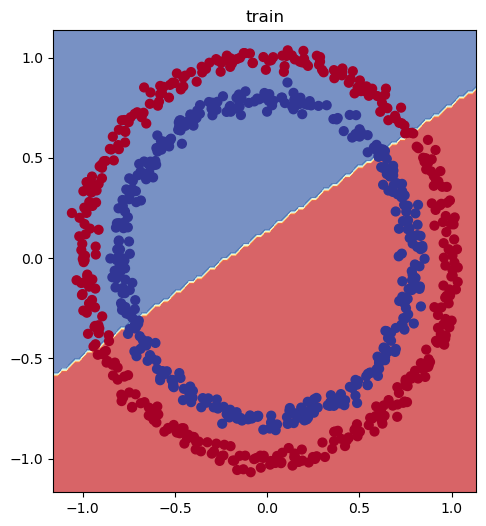

In [104]:
#plot decision boundary 
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("train")
plot_decision_boundary(model_0,X_train,y_train)